In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df  = pd.read_csv("List of Countries by Sugarcane Production.csv")

In [3]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [4]:
df.shape

(103, 7)

## Data Cleaning

In [5]:
df["Production (Tons)"] = df["Production (Tons)"].str.replace(".","")
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].str.replace(".","")
df["Yield (Kg / Hectare)"] = df["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")

In [6]:
df.rename(columns = {"Production per Person (Kg)" : "Production_per_Person (Kg)"}, inplace = True)

In [7]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production_per_Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [8]:
df.isna().sum()

Unnamed: 0                    0
Country                       0
Continent                     0
Production (Tons)             0
Production_per_Person (Kg)    0
Acreage (Hectare)             1
Yield (Kg / Hectare)          1
dtype: int64

In [9]:
df[df["Acreage (Hectare)"].isnull()]

,Unnamed: 0,Country,Continent,Production (Tons),Production_per_Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [10]:
df = df.dropna().reset_index()

In [11]:
df.head()

,index,Unnamed: 0,Country,Continent,Production (Tons),Production_per_Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [12]:
df.drop(["index", "Unnamed: 0"], axis = 1, inplace = True)

In [13]:
df.head()

,Country,Continent,Production (Tons),Production_per_Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [14]:
df.dtypes

Country                       object
Continent                     object
Production (Tons)             object
Production_per_Person (Kg)    object
Acreage (Hectare)             object
Yield (Kg / Hectare)          object
dtype: object

In [15]:
df["Production (Tons)"] = df["Production (Tons)"].astype(float)
df["Production_per_Person (Kg)"] = df["Production_per_Person (Kg)"].astype(float)
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].astype(float)
df["Yield (Kg / Hectare)"] = df["Yield (Kg / Hectare)"].astype(float)

In [16]:
df.head()

,Country,Continent,Production (Tons),Production_per_Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


In [17]:
df.dtypes

Country                        object
Continent                      object
Production (Tons)             float64
Production_per_Person (Kg)    float64
Acreage (Hectare)             float64
Yield (Kg / Hectare)          float64
dtype: object

In [18]:
df.nunique()

Country                       102
Continent                       6
Production (Tons)             102
Production_per_Person (Kg)    101
Acreage (Hectare)             101
Yield (Kg / Hectare)          102
dtype: int64

## Univariate Analysis

In [19]:
df.head()

,Country,Continent,Production (Tons),Production_per_Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


## How many countries produce sugarcane from each continent?

In [20]:
df["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

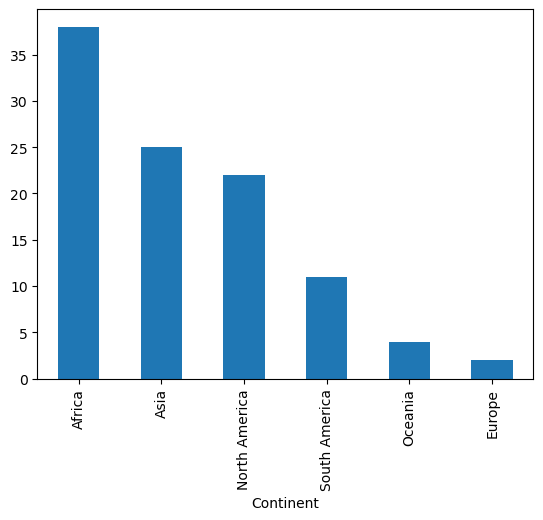

In [21]:
df["Continent"].value_counts().plot(kind = "bar")

/var/folders/xh/fqpb76jj4jbdm5hcv75vs_g00000gn/T/ipykernel_37632/3506258038.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production (Tons)"])
/var/folders/xh/fqpb76jj4jbdm5hcv75vs_g00000gn/T/ipykernel_37632/3506258038.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production_

<Axes: xlabel='Yield (Kg / Hectare)', ylabel='Density'>

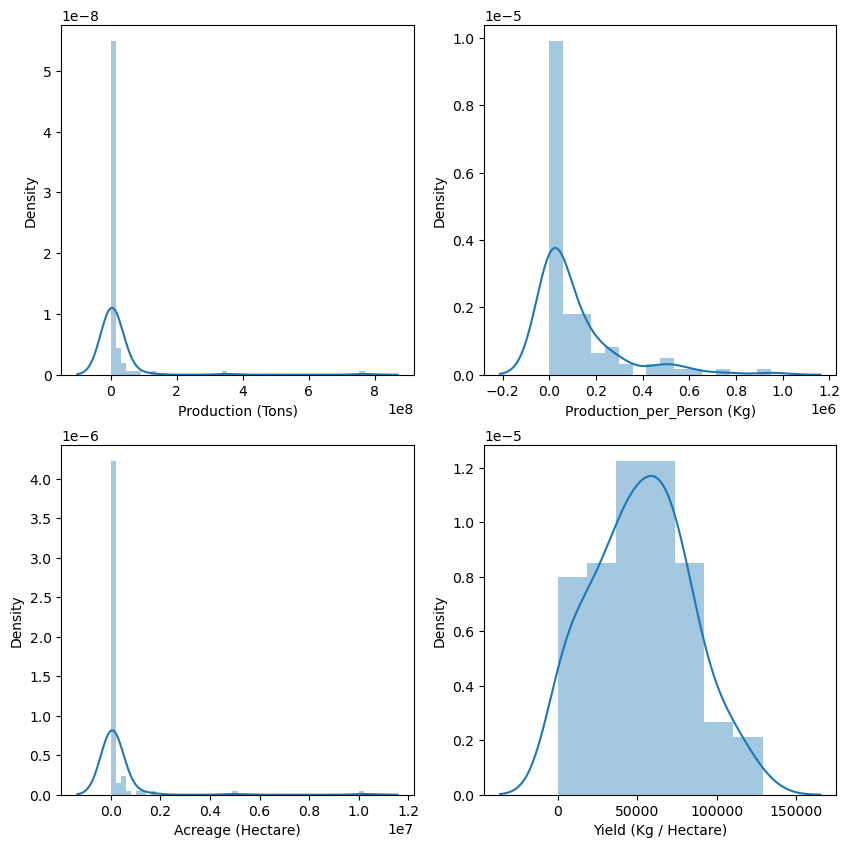

In [22]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.distplot(df["Production (Tons)"])
plt.subplot(2,2,2)
sns.distplot(df["Production_per_Person (Kg)"])
plt.subplot(2,2,3)
sns.distplot(df["Acreage (Hectare)"])
plt.subplot(2,2,4)
sns.distplot(df["Yield (Kg / Hectare)"])


## Checking Outliers

<Axes: >

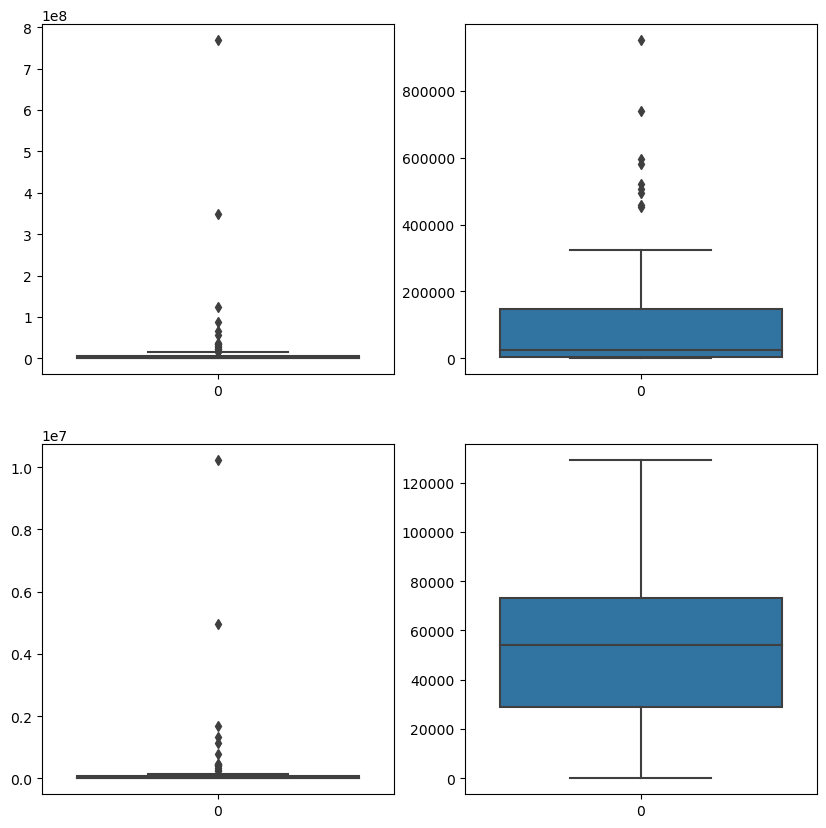

In [23]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.boxplot(df["Production (Tons)"])
plt.subplot(2,2,2)
sns.boxplot(df["Production_per_Person (Kg)"])
plt.subplot(2,2,3)
sns.boxplot(df["Acreage (Hectare)"])
plt.subplot(2,2,4)
sns.boxplot(df["Yield (Kg / Hectare)"])


## Bivariate Analysis

In [24]:
df.head()

,Country,Continent,Production (Tons),Production_per_Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


## Which country produces maximum sugarcane?

In [25]:
df_new = df[["Country", "Production (Tons)"]].set_index("Country")

In [26]:
df_new.head()

,Production (Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0


In [27]:
df_new["Production_percentage"] = df_new["Production (Tons)"] * 100 / df_new["Production (Tons)"].sum()

In [28]:
df_new.head()

,Production (Tons),Production_percentage
Country,,
Brazil,768678382.0,40.727285
India,348448000.0,18.462001
China,123059739.0,6.520138
Thailand,87468496.0,4.634389
Pakistan,65450704.0,3.467809


In [29]:
df_new.sort_values("Production_percentage", ascending = False)
df_new.head(10)

,Production (Tons),Production_percentage
Country,,
Brazil,768678382.0,40.727285
India,348448000.0,18.462001
China,123059739.0,6.520138
Thailand,87468496.0,4.634389
Pakistan,65450704.0,3.467809
Mexico,56446821.0,2.990751
Colombia,36951213.0,1.957805
Australia,34403004.0,1.822792
Guatemala,33533403.0,1.776718


<Axes: ylabel='Production_percentage'>

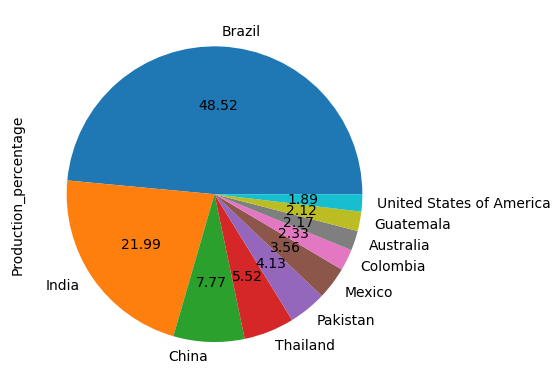

In [30]:
df_new["Production_percentage"].head(10).plot(kind = "pie", autopct = "%.2f")

## Which country has most land?

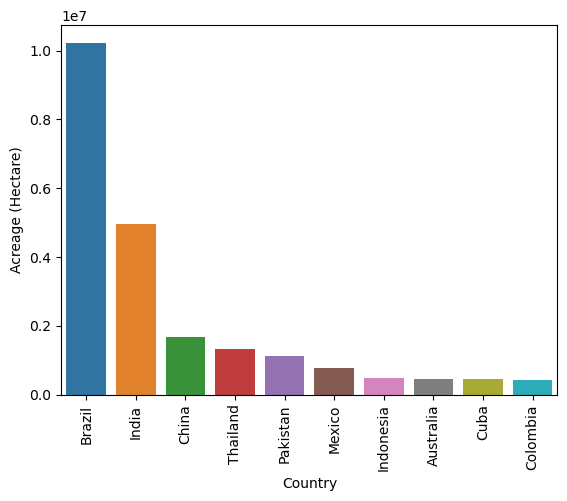

In [31]:
df_acr = df.sort_values("Acreage (Hectare)", ascending = False)
ax = sns.barplot(data = df_acr.head(10), x = "Country", y = "Acreage (Hectare)")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

## Which country has highest yield per hectare?

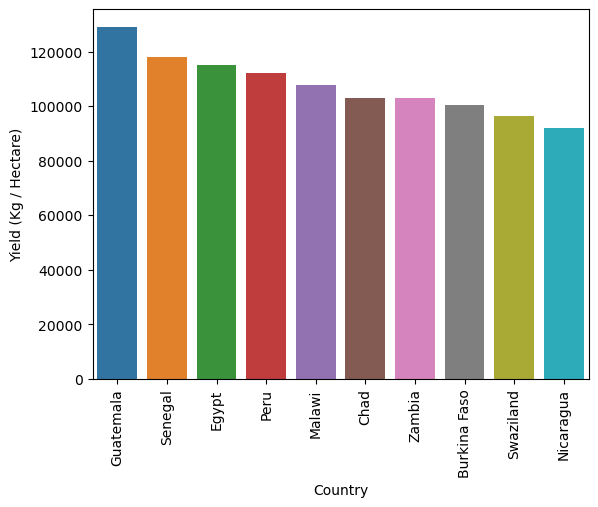

In [32]:
df_yield = df.sort_values("Yield (Kg / Hectare)", ascending = False)
ax = sns.barplot(data = df_yield.head(10), x = "Country", y = "Yield (Kg / Hectare)")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

## Correlation

In [34]:
df.corr(numeric_only = True)

,Production (Tons),Production_per_Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
Production (Tons),1.000000,0.015000,0.997550,0.132812
Production_per_Person (Kg),0.015000,1.000000,0.012557,0.017999
Acreage (Hectare),0.997550,0.012557,1.000000,0.113433
Yield (Kg / Hectare),0.132812,0.017999,0.113433,1.000000


<Axes: >

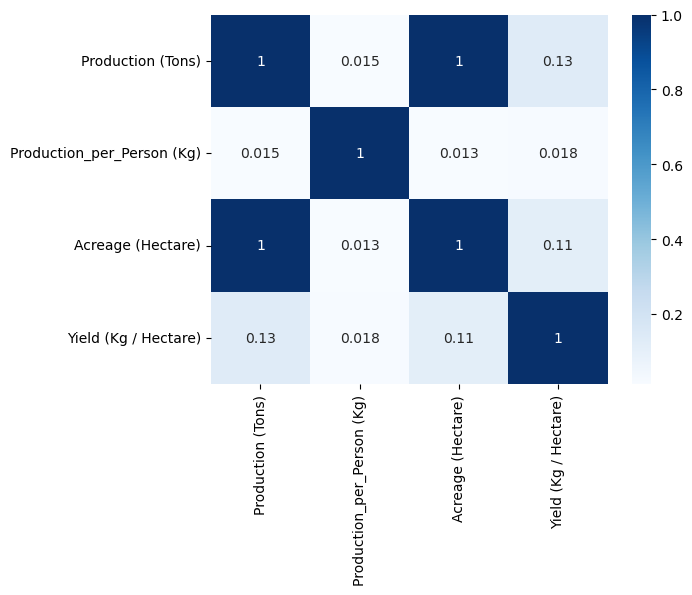

In [35]:
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap = "Blues")

## Analysis for Continents

In [41]:
df_continents = df.groupby("Continent").sum()
df_continents.drop(columns = "Country", axis = 1, inplace = True)

In [42]:
df_continents

,Production (Tons),Production_per_Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
Continent,,,,
Africa,89681472.0,2332636.293,1439089.0,2142107.5
Asia,721930425.0,1857769.303,10608319.0,1171871.4
Europe,5823.0,536.000,71.0,131870.9
North America,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,36177574.0,28593.605,490909.0,162419.1
South America,865588126.0,3505531.738,11369236.0,677192.7


## Which continent produces maximum sugarcane?

<Axes: xlabel='Continent'>

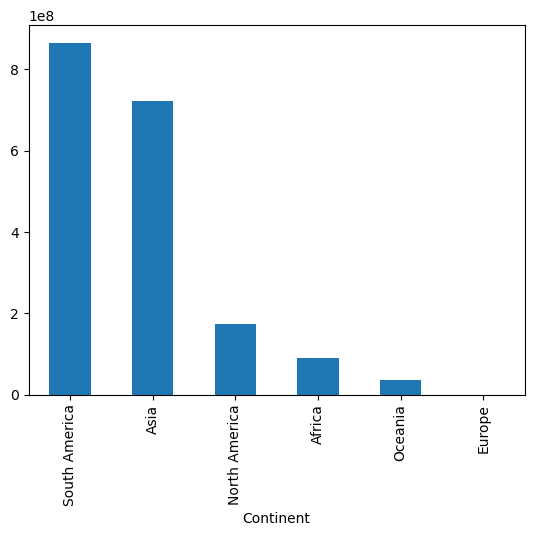

In [50]:
df_continents["Production (Tons)"].sort_values(ascending = False).plot(kind = "bar")

## Do number of countries in a continent affect the quantity of production?

In [52]:
df_continents["Number of Countries"] = df.groupby("Continent").count()["Country"]

In [53]:
df_continents

,Production (Tons),Production_per_Person (Kg),Acreage (Hectare),Yield (Kg / Hectare),Number of Countries
Continent,,,,,
South America,865588126.0,3505531.738,11369236.0,677192.7,11
Asia,721930425.0,1857769.303,10608319.0,1171871.4,25
North America,173995947.0,3796081.508,1581983.0,1082602.4,22
Africa,89681472.0,2332636.293,1439089.0,2142107.5,38
Oceania,36177574.0,28593.605,490909.0,162419.1,4
Europe,5823.0,536.000,71.0,131870.9,2


In [55]:
df_continents.corr(numeric_only = True)

,Production (Tons),Production_per_Person (Kg),Acreage (Hectare),Yield (Kg / Hectare),Number of Countries
Production (Tons),1.000000,0.522211,0.994897,0.091201,0.109244
Production_per_Person (Kg),0.522211,1.000000,0.463215,0.542961,0.540086
Acreage (Hectare),0.994897,0.463215,1.000000,0.111166,0.132817
Yield (Kg / Hectare),0.091201,0.542961,0.111166,1.000000,0.989712
Number of Countries,0.109244,0.540086,0.132817,0.989712,1.000000


## Distribution of production by Continent

<Axes: ylabel='Production (Tons)'>

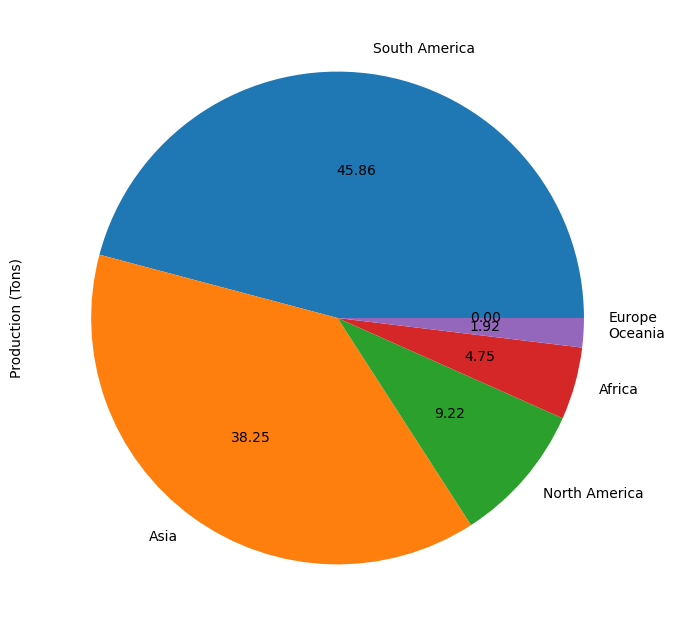

In [62]:
plt.figure(figsize = (8,8))
df_continents["Production (Tons)"].plot(kind = "pie", autopct = "%.2f")